# Dataset and Visualization Exercises


## Dataset: [World Happiness Report (Kaggle)](https://www.kaggle.com/datasets/unsdsn/world-happiness)

**Features include**:

* Country
* Region
* Happiness Score
* GDP per capita
* Social support
* Healthy life expectancy
* Freedom to make life choices
* Generosity
* Perceptions of corruption

---

## Exercise 1: Compare Happiness Across Regions

**Tasks**:

1. Create a boxplot showing the distribution of **Happiness Score** across different **regions**.
2. Use a violin plot to show the **distribution shape** within each region.
3. Identify which regions have the **highest variability** in happiness scores.

**Key concepts**: Category-based comparison, distribution visualization.

---

## Exercise 2: Relationship Between Wealth and Happiness

**Tasks**:

1. Create a scatter plot with **GDP per capita** on the x-axis and **Happiness Score** on the y-axis.
2. Add a **regression line** to assess the correlation.
3. Color the points by **region** to observe any regional trends.
4. Comment on whether wealth is a good predictor of happiness based on the plot.

**Key concepts**: Correlation analysis, multivariate scatter plots, trend lines.

---

## Exercise 3: The Role of Social Factors

**Tasks**:

1. Use a pairplot to visualize relationships between the following features:

   * Social support
   * Generosity
   * Perceptions of corruption
   * Happiness Score
2. Analyze which factors show a **stronger relationship** with happiness.
3. Comment on any **outliers** or **unexpected patterns** you observe.

**Key concepts**: Multivariate analysis, pairwise relationships, exploratory data analysis.

---

## Exercise 4: Mapping Global Happiness

**Tasks**:

1. Create a **choropleth map** showing the **Happiness Score** for each **country**.
2. Use a **color gradient** to indicate different levels of happiness.
3. Identify and comment on **regional clusters** of high or low happiness.

**Key concepts**: Geospatial data visualization, choropleth maps.

---

## Exercise 5: Ranking Countries by Happiness

**Tasks**:

1. Create a **horizontal bar plot** of the **top 10 happiest countries**, sorted by Happiness Score.
2. Create another bar plot for the **bottom 10 countries**.
3. Add **annotations** to display the exact Happiness Score for each country.
4. Reflect on any **patterns** in the top vs. bottom rankings.

**Key concepts**: Sorted bar plots, data ranking, annotations.

---

## Optional Extension

1. Create a **correlation heatmap** of all numeric features.
2. Identify which factors are **most correlated** with Happiness Score.
3. Discuss any **insights** or **surprising relationships**.

**Key concepts**: Heatmaps, correlation analysis.

---

## Tools you can use:

* Python: pandas, seaborn, matplotlib, plotly
* Jupyter Notebook
* Optional: geopandas or plotly express for the choropleth



In [1]:
# Imports
%pip install statsmodels
%pip install nbformat --upgrade
%pip install plotly


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Code - Exercise 1: Compare hapiness across regions

In [ ]:
import pandas as pd 

# List all CSV files in the directory
csv_files = ['2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv']

# Mapping of column names to padronize
columns_map = {
    '2015.csv': {'Country': 'Country',
        'Region': 'Region',
        'Happiness Score': 'Happiness Score',
        'Economy (GDP per Capita)': 'GDP per capita',
        'Social support': 'Social support',
        'Health (Life Expectancy)': 'Healthy life expectancy',
        'Freedom': 'Freedom to make life choices',
        'Generosity': 'Generosity',
        'Trust (Government Corruption)': 'Perceptions of corruption'
    },
    '2016.csv': {
        'Country': 'Country',
        'Region': 'Region',
        'Happiness Score': 'Happiness Score',
        'Economy (GDP per Capita)': 'GDP per capita',
        'Social support': 'Social support',
        'Health (Life Expectancy)': 'Healthy life expectancy',
        'Freedom': 'Freedom to make life choices',
        'Generosity': 'Generosity',
        'Trust (Government Corruption)': 'Perceptions of corruption'
    },
    '2017.csv': {
        'Country': 'Country',
        'Happiness.Score': 'Happiness Score',
        'Economy..GDP.per.Capita.': 'GDP per capita',
        'Social.support': 'Social support',
        'Health..Life.Expectancy.': 'Healthy life expectancy',
        'Freedom': 'Freedom to make life choices',
        'Generosity': 'Generosity',
        'Trust..Government.Corruption.': 'Perceptions of corruption',
        'Region': 'Region'
    },
    '2018.csv': {
        'Country or region': 'Country',
        'Score': 'Happiness Score',
        'GDP per capita': 'GDP per capita',
        'Social support': 'Social support',
        'Healthy life expectancy': 'Healthy life expectancy',
        'Freedom to make life choices': 'Freedom to make life choices',
        'Generosity': 'Generosity',
        'Perceptions of corruption': 'Perceptions of corruption'
    },
    '2019.csv': {
        'Country or region': 'Country',
        'Score': 'Happiness Score',
        'GDP per capita': 'GDP per capita',
        'Social support': 'Social support',
        'Healthy life expectancy': 'Healthy life expectancy',
        'Freedom to make life choices': 'Freedom to make life choices',
        'Generosity': 'Generosity',
        'Perceptions of corruption': 'Perceptions of corruption'
    }
}

# List of columns to keep
final_columns = [
    'Country',
    'Region',
    'Happiness Score',
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption',
    'Year'
]

dfs = []
for file in csv_files:
    df_temp = pd.read_csv(file)
    # Rename columns based on the mapping
    df_temp = df_temp.rename(columns=columns_map[file])
    # Add column 'Region' if it doesn't exist
    if 'Region' not in df_temp.columns:
        df_temp['Region'] = pd.NA
    # Add column 'Year'
    df_temp['Year'] = int(file[:4])
    
    # Ensures that all columns are present
    for col in final_columns:
        if col not in df_temp.columns:
            df_temp[col] = pd.NA
    # Select and order the padronized columns
    df_temp = df_temp[final_columns]
    dfs.append(df_temp)

# Gathers every csv years
df = pd.concat(dfs, ignore_index=True)

# View the first few lines
df.head()


C:\Users\cadl\AppData\Local\Temp\ipykernel_16460\3176835285.py:95: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dfs, ignore_index=True)


,Country,Region,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Switzerland,Western Europe,7.587,1.39651,NaN,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,7.561,1.30232,NaN,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,NaN,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,7.522,1.45900,NaN,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America,7.427,1.32629,NaN,0.90563,0.63297,0.45811,0.32957,2015


C:\Users\cadl\AppData\Local\Temp\ipykernel_16460\1514608038.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


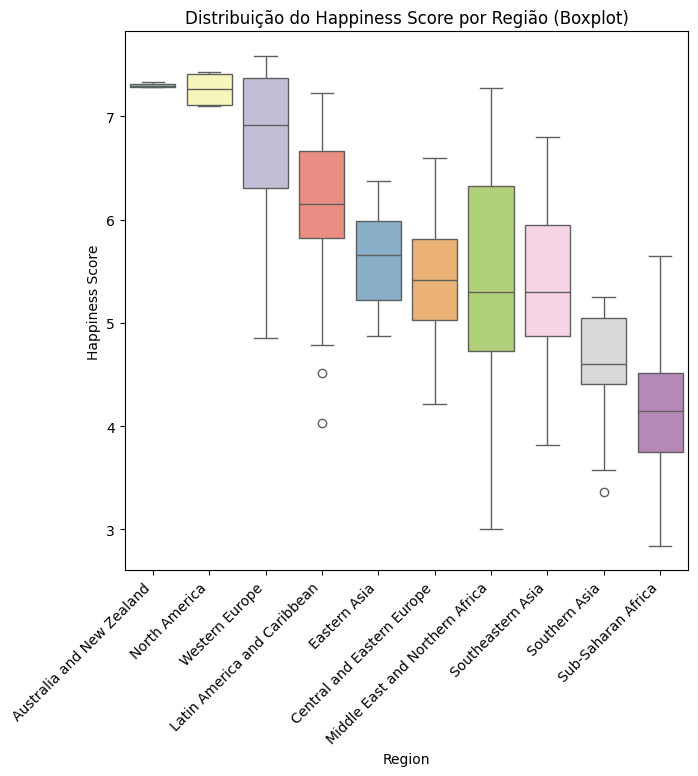

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only rows that have 'Region' filled in
df_region = df.dropna(subset=['Region'])

# Order regions by average happiness score
region_order = df_region.groupby('Region')['Happiness Score'].median().sort_values(ascending=False).index

plt.figure(figsize=(16, 7))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df_region,
    x='Region',
    y='Happiness Score',
    order=region_order,
    palette='Set3'
)
plt.xticks(rotation=45, ha='right')
plt.title('Distribuição do Happiness Score por Região (Boxplot)')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()

C:\Users\cadl\AppData\Local\Temp\ipykernel_16460\1317193040.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


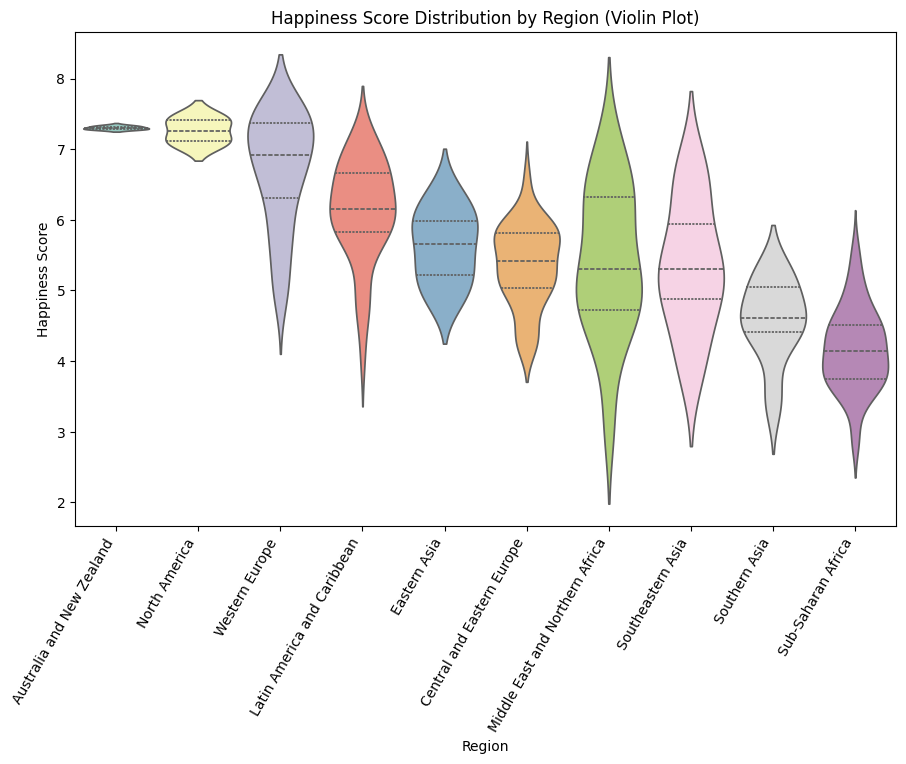

In [4]:
# increase the width and height of the figure
plt.figure(figsize=(18, 8))  

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(
    data=df_region,
    x='Region',
    y='Happiness Score',
    order=region_order,
    palette='Set3',
    inner='quartile'
)
plt.xticks(rotation=60, ha='right')  # rotates more and aligns to the right
plt.title('Happiness Score Distribution by Region (Violin Plot)')
plt.xlabel('Region')
plt.ylabel('Happiness Score')

plt.tight_layout(pad=2)  # adds extra spacing
plt.show()

C:\Users\cadl\AppData\Local\Temp\ipykernel_16460\763622210.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\cadl\AppData\Local\Temp\ipykernel_16460\763622210.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


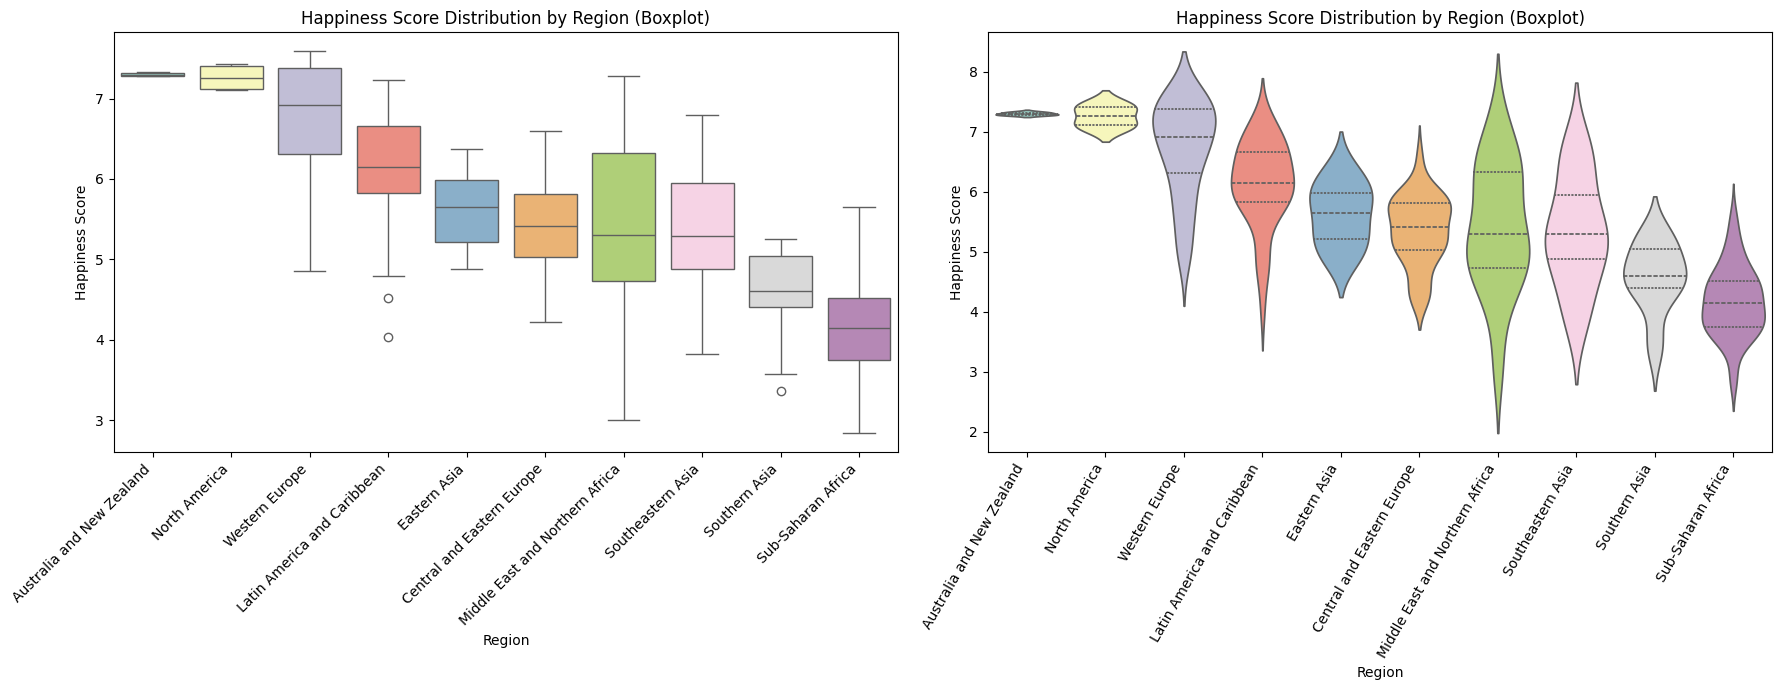

Regions with the greatest variability in Happiness Score:
Region
Middle East and Northern Africa    1.066028
Southeastern Asia                  0.912392
Western Europe                     0.797179
Latin America and Caribbean        0.719259
Sub-Saharan Africa                 0.582399
Central and Eastern Europe         0.575707
Southern Asia                      0.570575
Eastern Asia                       0.515481
North America                      0.175872
Australia and New Zealand          0.023838
Name: Happiness Score, dtype: float64


In [5]:
# Identify which regions have the greatest variability in happiness scores

import matplotlib.pyplot as plt
import seaborn as sns

# Filter only rows with 'Region' filled in
df_region = df.dropna(subset=['Region'])

# Order regions by the median of Happiness Score
region_order = df_region.groupby('Region')['Happiness Score'].median().sort_values(ascending=False).index

plt.figure(figsize=(18, 7))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df_region,
    x='Region',
    y='Happiness Score',
    order=region_order,
    palette='Set3'
)
plt.xticks(rotation=45, ha='right')
plt.title('Happiness Score Distribution by Region (Boxplot)')
plt.xlabel('Region')
plt.ylabel('Happiness Score')

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(
    data=df_region,
    x='Region',
    y='Happiness Score',
    order=region_order,
    palette='Set3',
    inner='quartile'
)
plt.xticks(rotation=60, ha='right')
plt.title('Happiness Score Distribution by Region (Boxplot)')
plt.xlabel('Region')
plt.ylabel('Happiness Score')

plt.tight_layout()
plt.show()

# Identify and display the regions with the greatest variability (standard deviation)
variabilidade = df_region.groupby('Region')['Happiness Score'].std().sort_values(ascending=False)
print("Regions with the greatest variability in Happiness Score:")
print(variabilidade)

C:\Users\cadl\AppData\Local\Temp\ipykernel_16460\3426993130.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


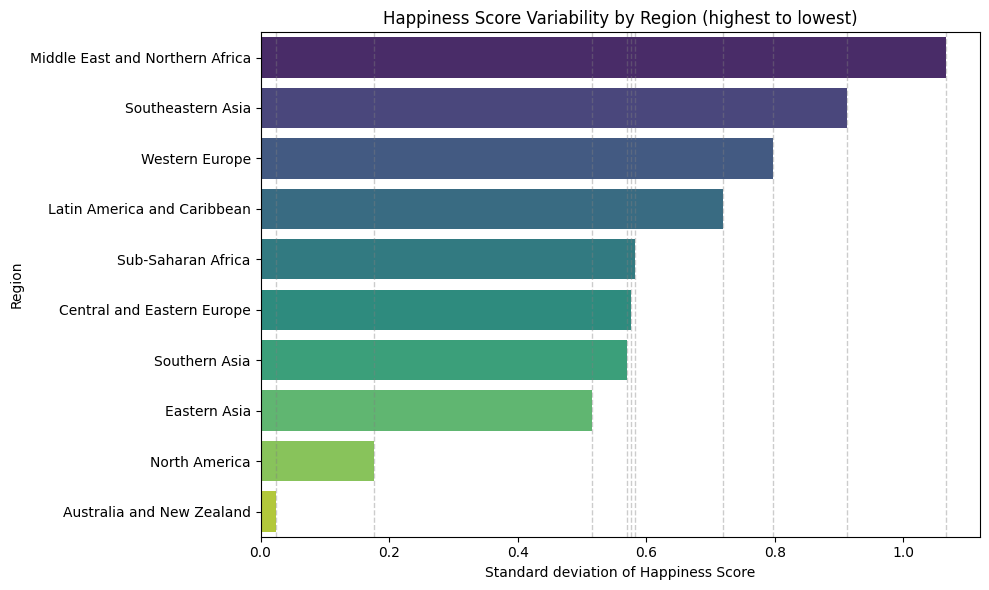

In [6]:
# Identify which regions have the greatest variability in happiness scores

import matplotlib.pyplot as plt

# Calculate the standard deviation of Happiness Score by region
variabilidade = df_region.groupby('Region')['Happiness Score'].std().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=variabilidade.values,
    y=variabilidade.index,
    palette='viridis'
)
ax.set_xlabel('Standard deviation of Happiness Score')
plt.ylabel('Region')
plt.title('Happiness Score Variability by Region (highest to lowest)')

# Add a faint vertical dashed line at the end of each bar
for i, v in enumerate(variabilidade.values):
    plt.axvline(x=v, color='gray', linestyle='--', linewidth=1, alpha=0.4)

plt.tight_layout()
plt.show()

# Code - Exercise 2 - Relationship between wealth and happiness

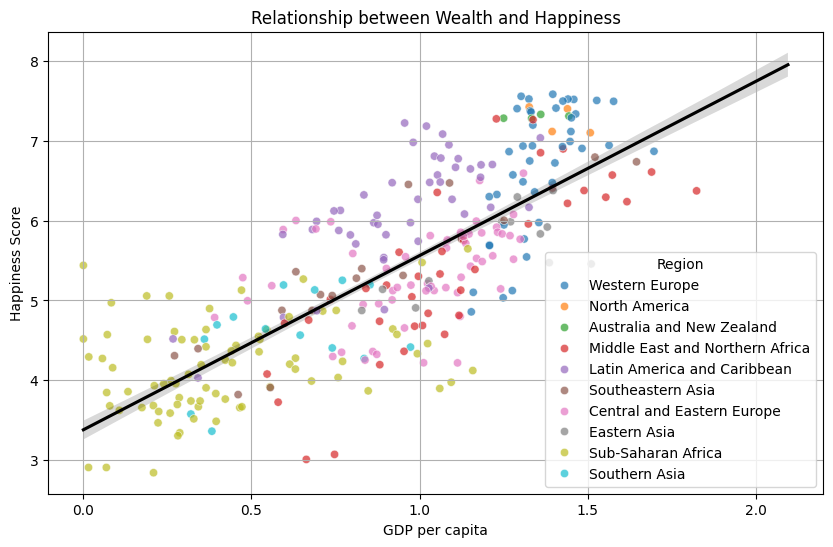

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot with GDP per capita (x-axis) and Happiness Score (y-axis), colored by region
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["GDP per capita"], y=df["Happiness Score"], hue=df["Region"], alpha=0.7)

# Add regression line
sns.regplot(x=df["GDP per capita"], y=df["Happiness Score"], scatter=False, color="black")

plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
plt.title("Relationship between Wealth and Happiness")
plt.legend(title="Region")
plt.grid(True)
plt.show()

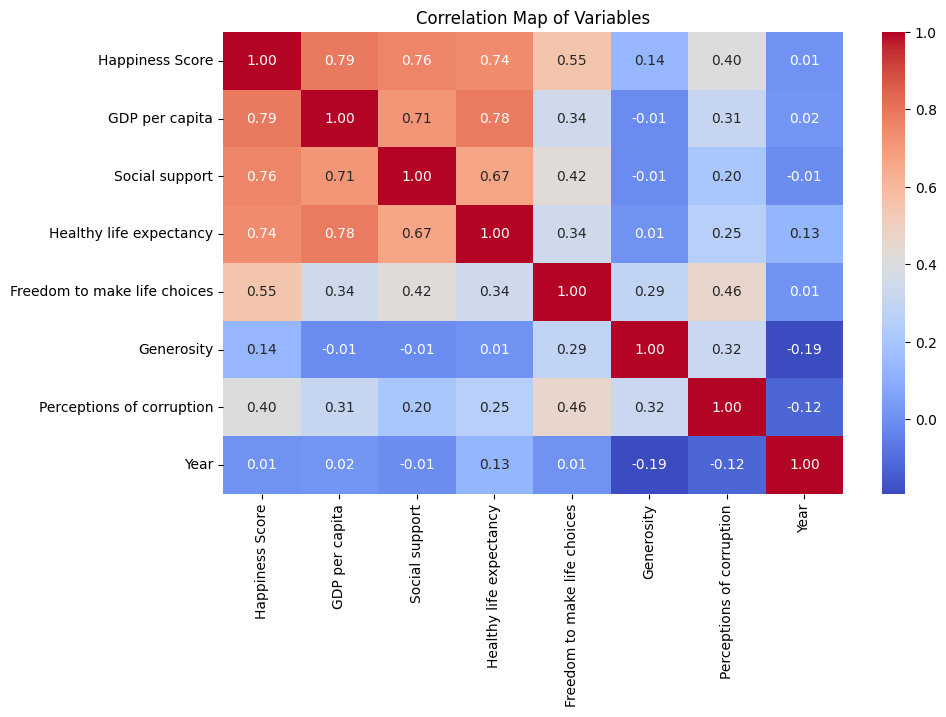

In [8]:
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Map of Variables")
plt.show()


In [9]:
# Testing correlation map

import statsmodels.api as sm # type: ignore

# Select independent and dependent variables
X = df[["GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices"]]
y = df["Happiness Score"]

# Remove rows with missing values in X or y
Xy = pd.concat([X, y], axis=1).dropna()
X_clean = Xy[["GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices"]]
y_clean = Xy["Happiness Score"]

# Add constant to the model
X_clean = sm.add_constant(X_clean)

# Create and fit the model
modelo = sm.OLS(y_clean, X_clean).fit()

# Show the results
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     266.1
Date:                Tue, 27 May 2025   Prob (F-statistic):           2.01e-98
Time:                        01:32:34   Log-Likelihood:                -242.58
No. Observations:                 312   AIC:                             495.2
Df Residuals:                     307   BIC:                             513.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Code - Exercise 3 - The role of social factors

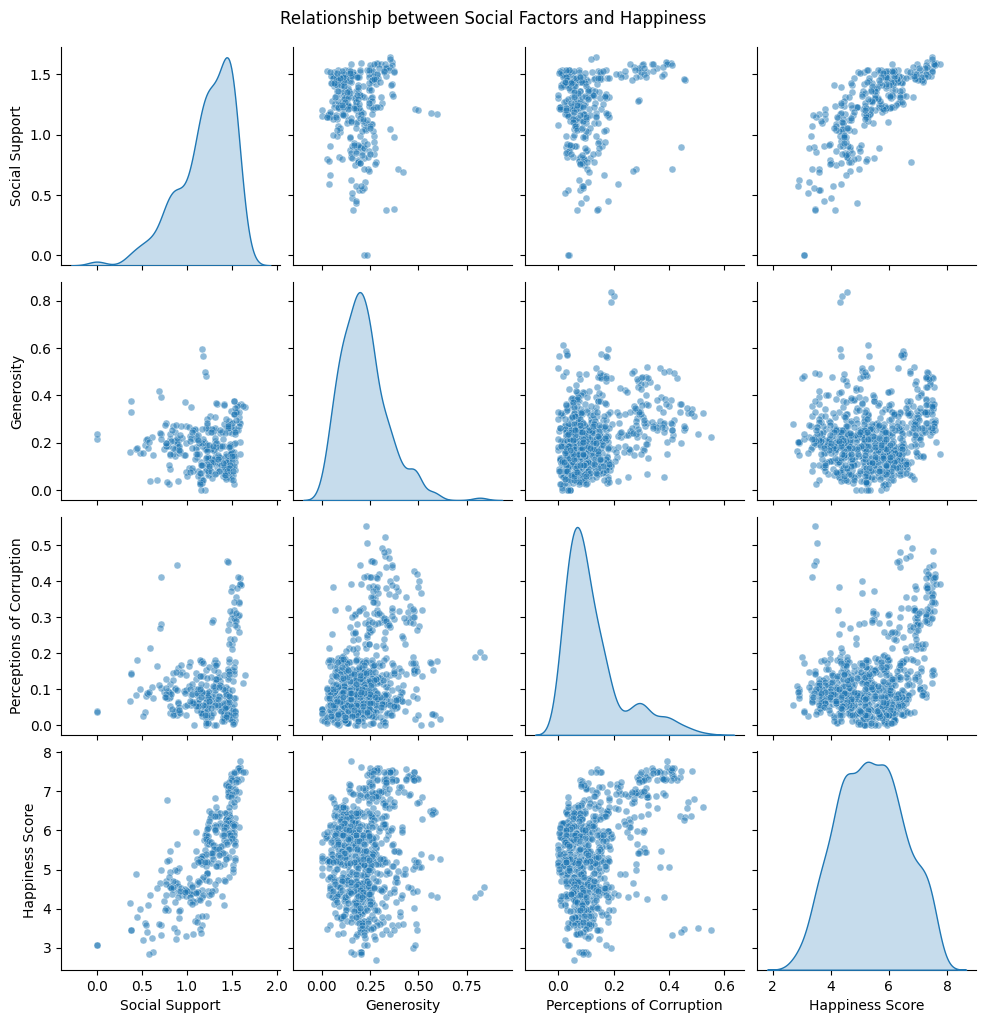

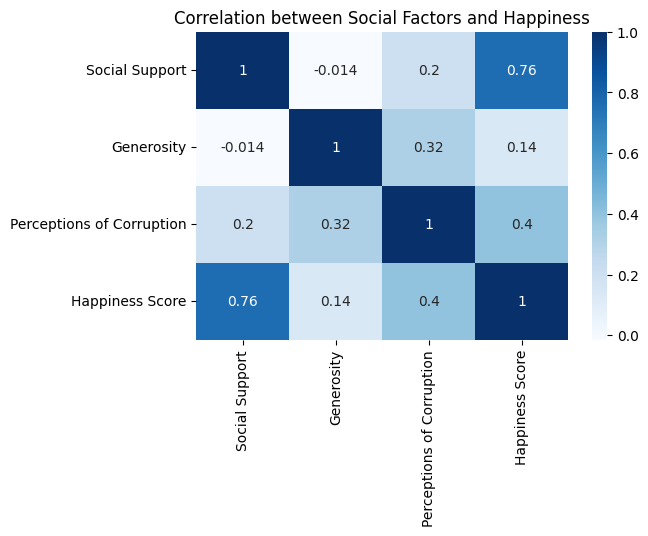

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rename columns to facilitate axis reading (English)
df_social = df[["Social support", "Generosity", "Perceptions of corruption", "Happiness Score"]].rename(columns={
    "Social support": "Social Support",
    "Generosity": "Generosity",
    "Perceptions of corruption": "Perceptions of Corruption",
    "Happiness Score": "Happiness Score"
})

# Create the pairplot with English column names and more transparent points
sns.pairplot(df_social, diag_kind="kde", plot_kws={"alpha": 0.5, "s": 25})

plt.suptitle("Relationship between Social Factors and Happiness", y=1.02)
plt.show()

# Show the correlation matrix to reinforce the visual analysis
plt.figure(figsize=(6, 4))
sns.heatmap(df_social.corr(), annot=True, cmap="Blues")
plt.title("Correlation between Social Factors and Happiness")
plt.show()

# Code - Exercise 4 - Mapping Global Happines

In [15]:
import plotly.express as px

df_map = df[["Country", "Happiness Score"]].groupby("Country", as_index=False).mean()

fig = px.choropleth(
    df_map,
    locations="Country",
    locationmode="country names",
    color="Happiness Score",
    color_continuous_scale="RdYlGn",
    title="Global Happiness Map"
)

fig.show()

# Code - Exercise 5: Ranking Countries by Happiness

In [ ]:
# Sort countries by Happiness Score and select the top 10 happiest
top_10 = df[["Country", "Happiness Score"]].dropna().sort_values(by="Happiness Score", ascending=False).head(10)

# Show which countries are in the top 10
print("Top 10 happiest countries:")
print(top_10["Country"])
print(top_10.shape)

# Group by country, calculate the mean Happiness Score, and get the top 10
top_10 = df[["Country", "Happiness Score"]].dropna().groupby("Country", as_index=False).mean().sort_values(by="Happiness Score", ascending=False).head(10)


Top 10 happiest countries:
626        Finland
470        Finland
627        Denmark
471         Norway
0      Switzerland
1          Iceland
472        Denmark
628         Norway
315         Norway
2          Denmark
Name: Country, dtype: object
(10, 2)


C:\Users\cadl\AppData\Local\Temp\ipykernel_16460\1317099102.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




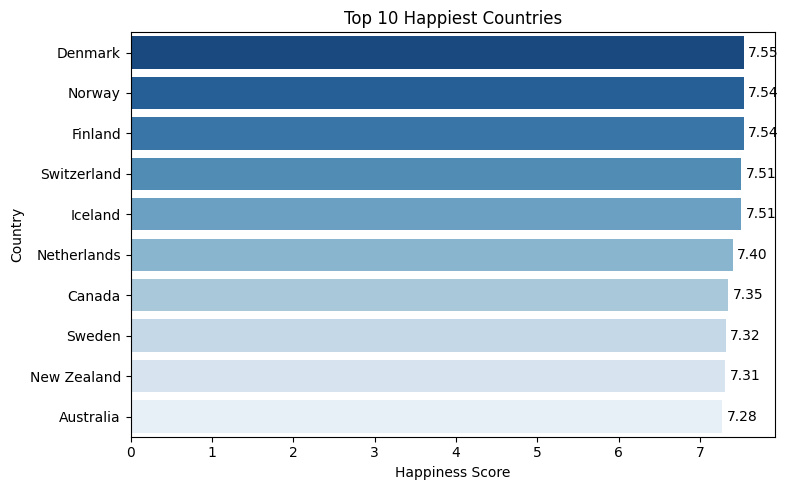

In [27]:
# Plot of the top 10 happiest countries
plt.figure(figsize=(8, 5))
sns.barplot(
    y=top_10["Country"],
    x=top_10["Happiness Score"],
    palette="Blues_r"
)
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.title("Top 10 Happiest Countries")
#rplt.grid(axis="x")

# Add annotations with the exact value
for i, (score, country) in enumerate(zip(top_10["Happiness Score"], top_10["Country"])):
    plt.text(score + 0.05, i, f"{score:.2f}", va="center")

plt.tight_layout()
plt.show()

C:\Users\cadl\AppData\Local\Temp\ipykernel_16460\2270471526.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




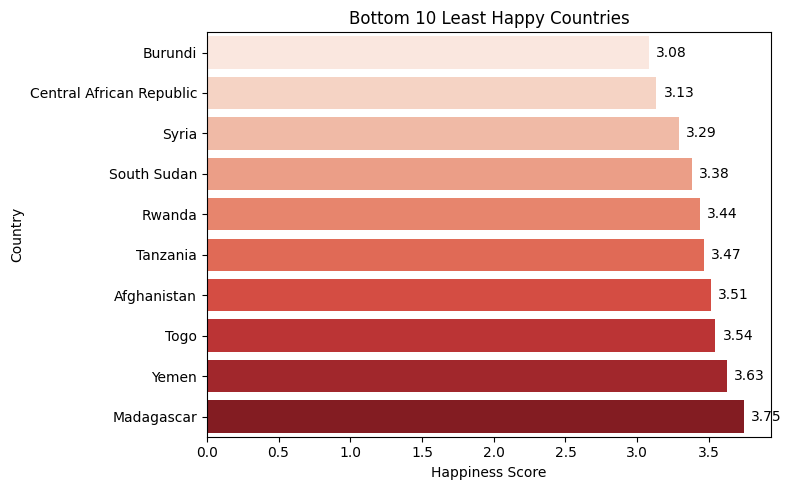

In [28]:
# Plot of the 10 least happy countries
bottom_10 = (
    df[["Country", "Happiness Score"]]
    .dropna()
    .groupby("Country", as_index=False)
    .mean()
    .sort_values(by="Happiness Score", ascending=True)
    .head(10)
)

plt.figure(figsize=(8, 5))
sns.barplot(
    y=bottom_10["Country"],
    x=bottom_10["Happiness Score"],
    palette="Reds"
)
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.title("Bottom 10 Least Happy Countries")
# plt.grid(axis="x")

# Add annotations with the exact value
for i, (score, country) in enumerate(zip(bottom_10["Happiness Score"], bottom_10["Country"])):
    plt.text(score + 0.05, i, f"{score:.2f}", va="center")

plt.tight_layout()
plt.show()
